In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

from context import clustering, findendpoints, filterbythreshold, voiceactivitydetector
from context import memorystorage, get_environment_percentile

In [10]:
test_cases = json.load(open('testCases.json', 'r'))
storage = memorystorage.MemoryStorage()
approaches = {
    'Clustering': clustering.Clusterer(storage),
    'Endpoint Finding': findendpoints.EndpointFinder(storage),
    'Filter By Threshold': filterbythreshold.Filterer(storage),
    'VAD': voiceactivitydetector.VoiceActivityDetector(),
    'True': None
}
m_map = {}
error_map = {}

for name, detector in approaches.items():
    print('Running Method: {}'.format(name))
    measurements = []
    errors = []
    for case in test_cases:
        if name == 'True':
            measurements.append(case['speechDuration'])
            errors.append(0)
        else:
            threshold = get_environment_percentile('recordings/' + case['ambUri'])
            id = storage.create_evaluation(threshold, '')
            audio, sr = sf.read('recordings/' + case['speechUri'])
            duration = detector.measure(audio, sr, id, '')
            measurements.append(duration)
            errors.append(duration - case['speechDuration'])
    m_map[name] = measurements
    error_map[name] = errors

Running Method: Clustering
Running Method: Endpoint Finding
Running Method: Filter By Threshold
Running Method: VAD
Running Method: True


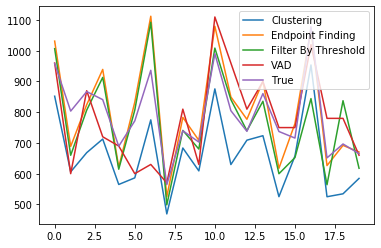

In [11]:
for name, results in m_map.items():
    plt.plot(results, label=name)
plt.legend()
plt.show()

Clustering Average: 128.41029251700678
Endpoint Finding Average: 57.19830158730163
Filter By Threshold Average: 73.61975056689343
VAD Average: 83.215
True Average: 0.0


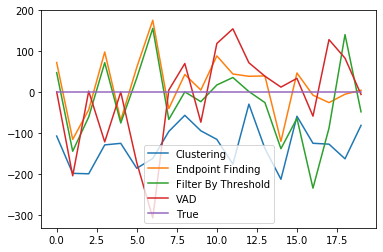

In [12]:
for name, results in error_map.items():
    plt.plot(results, label=name)
    avg = np.mean(np.abs(results))
    print('{} Average: {}'.format(name, avg))
plt.legend()
plt.show()